In [1]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
import yfinance as yf
import warnings
warnings.filterwarnings("ignore")

***
<font size="6">Part 1 Equally weighted portfolio<font>
***

In [2]:
# download related data
jpm=yf.download("JPM",interval="1d", start="2021-01-01", end="2021-12-31")
dis=yf.download("DIS",interval="1d", start="2021-01-01", end="2021-12-31")
wmt=yf.download("WMT",interval="1d", start="2021-01-01", end="2021-12-31")

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [3]:
# Compute related simple return
jpm["Return"]=(jpm["Close"]-jpm["Close"].shift(1))/jpm["Close"].shift(1)
dis["Return"]=(dis["Close"]-dis["Close"].shift(1))/dis["Close"].shift(1)
wmt["Return"]=(wmt["Close"]-wmt["Close"].shift(1))/wmt["Close"].shift(1)

In [4]:
# Compute related mean return and standard deviation
# mu_jpm = jpm["Return"].mean()
# mu_dis = dis["Return"].mean()
# mu_wmt = wmt["Return"].mean()

sigma_jpm = jpm["Return"].std()
sigma_dis = dis["Return"].std()
sigma_wmt = wmt["Return"].std()

In [5]:
# Create a data frame to store the returns
data=pd.DataFrame()
data["jpm"]=jpm["Return"]
data["dis"]=dis["Return"]
data["wmt"]=wmt["Return"]

data = data.dropna()

In [6]:
# Compute mean returns and covariance
mu =data.mean()
SIGMA=data.cov()
SIGMA,mu

(          jpm       dis       wmt
 jpm  0.000181  0.000089  0.000025
 dis  0.000089  0.000246  0.000020
 wmt  0.000025  0.000020  0.000111,
 jpm    0.000971
 dis   -0.000476
 wmt    0.000029
 dtype: float64)

In [7]:
# Calculate the return and standard deviation of PF1
equal_weight=np.array([1/3,1/3,1/3])
PF1_mu = equal_weight.dot(mu)
PF1_sigma = equal_weight.dot(SIGMA).dot(equal_weight.T)**0.5
PF1_mu,PF1_sigma**2

(0.00017449166193227406, 8.946410058950474e-05)

***
<font size="6">Part 1 Answers<font>
***


<font size="4">
Equally weighted portfolio (PF.1):<br>
- Mean: 0.00017449166193227406 <br>
- Variance: 8.946410058950474e-05
<font>

***
<font size="6"> Part 2 Portfolios with various weights and risk-free asset<font>
***

In [9]:
# Create a new dataframe and store 1000 sets of weights inside
Portfolio2=pd.DataFrame()
Portfolio2["w1"]=np.random.uniform(-1,1,1000)
Portfolio2["w2"]=np.random.uniform(-1,1,1000)
Portfolio2["w3"]=1-Portfolio2["w1"]-Portfolio2["w2"]
Portfolio2

,w1,w2,w3
0,0.043767,-0.795256,1.751489
1,0.375698,0.625780,-0.001477
2,-0.463854,0.061229,1.402625
3,0.689493,-0.536062,0.846569
4,-0.811888,0.733759,1.078129
...,...,...,...
995,0.992264,-0.219110,0.226846
996,-0.377414,0.520679,0.856735
997,-0.195409,0.899474,0.295936
998,0.653509,0.705541,-0.359050


In [10]:
# Compute mean returns and standard deviations for different weights
Portfolio2['mu']=[Portfolio2.iloc[t,0:3].values.dot(mu) for t in Portfolio2.index]
Portfolio2["var"]=[Portfolio2.iloc[t,0:3].values.dot(SIGMA).dot(Portfolio2.iloc[t,0:3].values.T) for t in Portfolio2.index]
Portfolio2["sigma"]=(Portfolio2["var"])**0.5
Portfolio2["sharpe"]=(Portfolio2["mu"]-0.00018)/Portfolio2["sigma"]

In [11]:
# Find out the best portfolio among those with similar standard deviation with PF1
similar_pf=Portfolio2.loc[Portfolio2["sigma"].between(PF1_sigma-0.0001,PF1_sigma+0.0001)]
best_similar_pf_id=similar_pf["sharpe"].idxmax()
similar_pf,Portfolio2.iloc[best_similar_pf_id]


(           w1        w2        w3        mu       var     sigma    sharpe
 43   0.282915  0.375742  0.341343  0.000106  0.000091  0.009535 -0.007802
 84   0.330034 -0.076527  0.746494  0.000378  0.000088  0.009404  0.021056
 281  0.006966  0.151853  0.841181 -0.000041  0.000090  0.009470 -0.023388
 290  0.566658 -0.000301  0.433644  0.000563  0.000091  0.009549  0.040057
 311  0.089174  0.068487  0.842340  0.000078  0.000088  0.009402 -0.010849
 345  0.371641 -0.100856  0.729215  0.000429  0.000090  0.009506  0.026247
 451  0.388375 -0.109194  0.720819  0.000449  0.000091  0.009545  0.028231
 478  0.407975  0.282038  0.309987  0.000271  0.000091  0.009519  0.009525
 481  0.029006  0.137459  0.833535 -0.000013  0.000088  0.009396 -0.020589
 491 -0.009107  0.173202  0.835905 -0.000067  0.000090  0.009483 -0.026086
 585 -0.018879  0.226324  0.792555 -0.000103  0.000088  0.009374 -0.030231
 746 -0.035352  0.329824  0.705528 -0.000171  0.000088  0.009379 -0.037431
 768  0.139704  0.435662 

In [12]:
# Find out the best portfolio
maxid=Portfolio2["sharpe"].sort_values().index[-1]
PF2=Portfolio2.iloc[maxid]
PF2["mu"],PF2["sigma"],PF2["sharpe"]

(0.0011568195295209626, 0.013321815822583512, 0.0733248036551467)

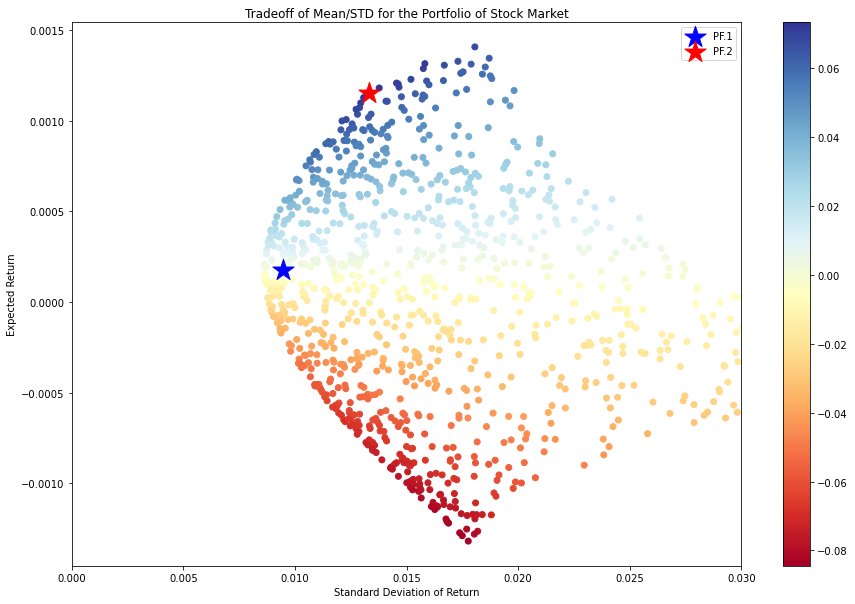

In [13]:
# Size of the graph
plt.figure(figsize=(15,10))

# Title
plt.title("Tradeoff of Mean/STD for the Portfolio of Stock Market")

# Plot: Expected return of the Portfolio vs SD of the Portfolio
# Use the Sharpe ratio as the color of each Portfolio
plt.scatter(Portfolio2["sigma"],Portfolio2["mu"],c=Portfolio2["sharpe"],cmap='RdYlBu')

# Labels
plt.xlabel('Standard Deviation of Return')
plt.ylabel('Expected Return')

# Limit the x-axis from 0 to 0.03
plt.xlim(0,0.03)

# Display the color bar beside
plt.colorbar()

# Blue star: PF1 Red star: PF2 
plt.scatter(PF1_sigma,PF1_mu,marker='*',color='blue',s=500,label="PF.1")
plt.scatter(Portfolio2.loc[maxid,"sigma"],Portfolio2.loc[maxid,"mu"],marker='*',color='red',s=500,label="PF.2")

# # Green star: jpm
# plt.scatter(sigma_jpm,mu_jpm,marker='*',color='green',s=500,label="jpm")

# # Blue star: dis
# plt.scatter(sigma_dis,mu_dis,marker='*',color='cyan',s=500,label="dis")

# # Purple star: wmt
# plt.scatter(sigma_wmt,mu_wmt,marker='*',color='purple',s=500,label="wmt")


plt.legend()
plt.show()


In [14]:
# Create a new dataframe and store 1000 sets of weights of T-bond and the risky portfolio, the mean returns and standard deviations inside
Portfolio3=pd.DataFrame()
Portfolio3["w1"]=np.arange(-1,1,0.01)
Portfolio3["w2"]=1-Portfolio3["w1"]
Portfolio3["mu"]=Portfolio3["w1"]*0.00018+Portfolio3["w2"]*PF2["mu"]
Portfolio3["sigma"]=Portfolio3["w2"]*PF2["sigma"]

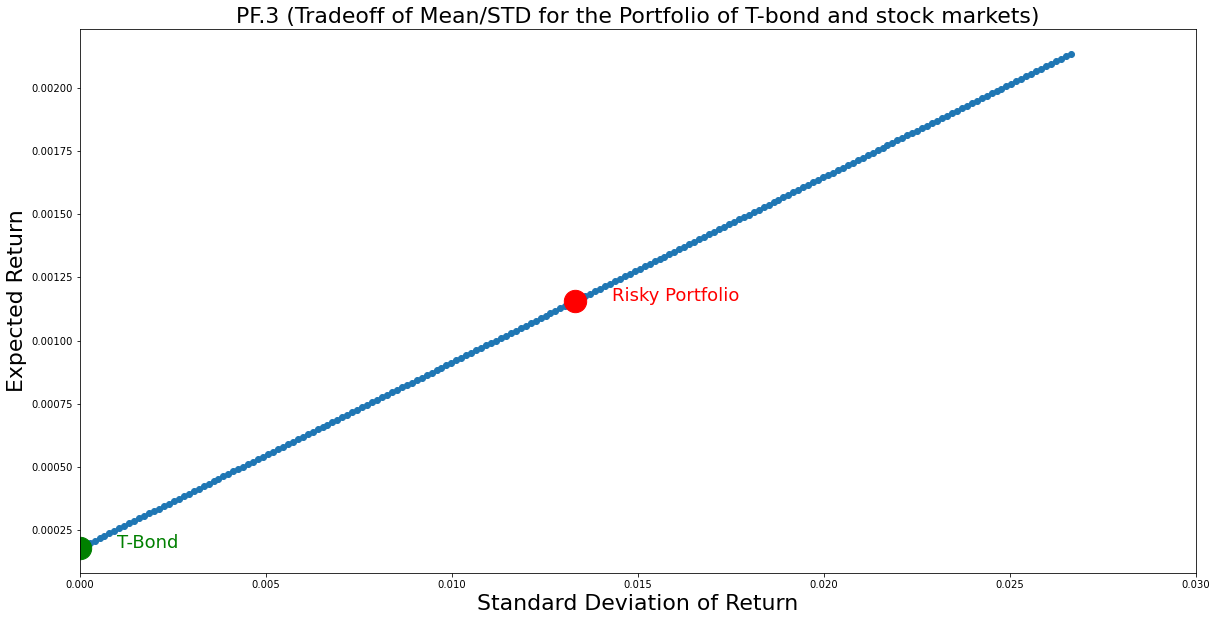

In [15]:
# Size of graph
plt.figure(figsize=(20,10))

# Limit of x-axis from 0 to 0.03
plt.xlim(0,0.03)

# Title
plt.title("PF.3 (Tradeoff of Mean/STD for the Portfolio of T-bond and stock markets)",fontsize=22)

# Plot: Expected return of expanded portfolio with T-bond vs SD of expanded portfolio with T-bond
plt.scatter(Portfolio3["sigma"],Portfolio3["mu"])

# labels
plt.xlabel('Standard Deviation of Return',fontsize=22)
plt.ylabel('Expected Return',fontsize=22)

# Red Point: portfolio with highest Sharpe Ratio
plt.scatter(Portfolio2.loc[maxid,"sigma"],Portfolio2.loc[maxid,"mu"],color='r',s=500)
plt.annotate("Risky Portfolio", (Portfolio2.loc[maxid,"sigma"]+0.001, Portfolio2.loc[maxid,"mu"]),color="r",fontsize=18)

# Green Point: T-bond only
plt.scatter(0,0.00018,color='g',s=500)
plt.annotate("T-Bond", (0.001, 0.00018),color="green",fontsize=18)

plt.show()

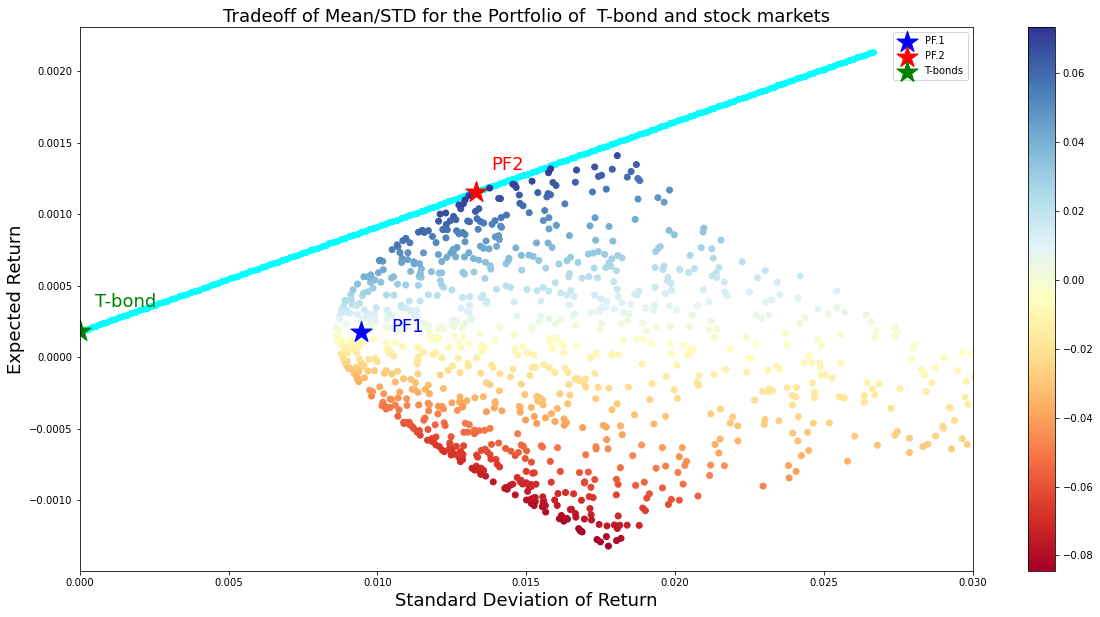

In [28]:
# Size of graph
plt.figure(figsize=(20,10))

# Limit of x-axis from 0 to 0.03
plt.xlim(0,0.03)

# Title
plt.title("Tradeoff of Mean/STD for the Portfolio of  T-bond and stock markets",fontsize=18)

# Plot: Expected return of expanded portfolio with T-bond vs SD of expanded portfolio with T-bond
plt.scatter(Portfolio3["sigma"], Portfolio3["mu"],color="cyan")

# Plot: Expected return of the Portfolio VS SD of the Portfolio 
# Use the Sharpe ratio as the color of each Portfolio
plt.scatter(Portfolio2["sigma"],Portfolio2["mu"],c=Portfolio2["sharpe"],cmap='RdYlBu')

# labels
plt.xlabel('Standard Deviation of Return',fontsize=18)
plt.ylabel('Expected Return',fontsize=18)

# Display the colorbar beside
plt.colorbar()

# Blue star: PF1 Red star: portfolio with highest Sharpe Ratio Green Star: T-bonds
plt.scatter(PF1_sigma,PF1_mu,marker='*',color='blue',s=500,label="PF.1")
plt.annotate("PF1", (PF1_sigma+0.001, PF1_mu),color="b",fontsize=18)

plt.scatter(Portfolio2.loc[maxid,"sigma"],Portfolio2.loc[maxid,"mu"],marker='*',color='r',s=500,label="PF.2")
plt.annotate("PF2", (Portfolio2.loc[maxid,"sigma"]+0.0005, Portfolio2.loc[maxid,"mu"]+0.00015),color="r",fontsize=18)

plt.scatter(0,0.00018,marker='*',color='g',s=500,label="T-bonds")
plt.annotate("T-bond", (0.0005, 0.00018+0.00017),color="g",fontsize=18)

plt.legend()
plt.show()

***
<font size="6">Part 2 Answers<font>
***

<font size="4">
1. Possible Portfolios having sd of PF1 +-0.0001 and the preferred portfolio among them are reported above <br><br>
2. The portfolio with maximum Sharpe ratio (PF.2):<br>
-  mean = 0.0011568195295209626 <br>
-  standard deviation = 0.013321815822583512
<font>

***
<font size="6">Part 3 CAPM MODEL<font>
***

In [29]:
# Download data of sp500
sp500=yf.download("^GSPC",interval="1d", start="2021-01-01", end="2021-12-31")
sp500["Return"]=(sp500["Close"]-sp500["Close"].shift(1))/sp500["Close"].shift(1)

[*********************100%***********************]  1 of 1 completed


In [30]:
# Create a new dataframe to store the returns of sp500 and disney and their excess returns
return_panel=pd.DataFrame()
return_panel['sp500'] = sp500["Return"]
return_panel['dis'] = dis["Return"]
return_panel = return_panel.dropna()
return_panel["excessdis"]=return_panel["dis"]-0.00018
return_panel["excesssp500"]=return_panel["sp500"]-0.00018

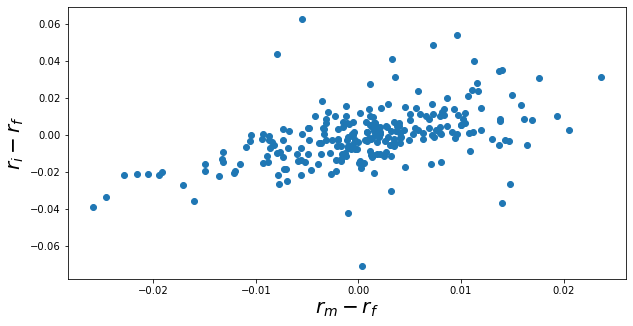

In [31]:
# Plot a graph showcasing the linear relations of the excess returns
plt.figure(figsize = (10, 5))
plt.scatter(return_panel['excesssp500'],return_panel["excessdis"])
plt.xlabel(r"$r_m-r_f$",fontsize=20)
plt.ylabel(r"$r_i-r_f$",fontsize=20)
plt.show()

In [33]:
# Linear regression analysis of the excess returns
lm_dis=sm.OLS(return_panel['excessdis'], sm.add_constant(return_panel['excesssp500'])).fit()
lm_dis.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              excessdis   R-squared:                       0.240
Model:                            OLS   Adj. R-squared:                  0.237
Method:                 Least Squares   F-statistic:                     78.80
Date:                Tue, 22 Mar 2022   Prob (F-statistic):           1.39e-16
Time:                        22:49:09   Log-Likelihood:                 721.97
No. Observations:                 251   AIC:                            -1440.
Df Residuals:                     249   BIC:                            -1433.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const          -0.0014      0.001     -1.627      0.105      -0.003       0.000
excesssp500     0.9296      0.105      8.877      0.000       0.723       1.136
==============================================================================
Omnibus:                       46.785   Durbin-Watson:                   2.095
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              455.724
Skew:                           0.288   Prob(JB):                     1.10e-99
Kurtosis:                       9.576   Cond. No.                         121.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

***
<font size="6">Part 3 Anwsers<font>
***

<font size="4">
1. Based on the result of CAPM, we have alpha = -0.0014 which is negative. Disney is not performed as well as the market. <br><br>
2. Based on the result of CAPM, beta of Disney = 0.9296 < 1, so it is defensive which means less risky comparing
 to the market last year.
<br><br>
3. Yes, we can use CAPM to do the forecasting, because we have a F value = 1.39e- 16, which is smaller than 0.05, we reject H0 at significance level at 0.05.<br>
Also, the p-value of excess Sp500= 0 is smaller than alpha, so we reject H0 at significance level at 0.05.<br>
Therefore, our model is useful in forecasting the return of Disney.
<font>